In [1]:
# Import libraries needed for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
##Read the local dataset copy

credit_df = pd.read_csv("german_credit.csv")

#sanity check
credit_df.head(2).T

,0,1
default,0,1
account_check_status,< 0 DM,0 <= ... < 200 DM
duration_in_month,6,48
credit_history,critical account/ other credits existing (not ...,existing credits paid back duly till now
purpose,domestic appliances,domestic appliances
credit_amount,1169,5951
savings,unknown/ no savings account,... < 100 DM
present_emp_since,.. >= 7 years,1 <= ... < 4 years
installment_as_income_perc,4,2
personal_status_sex,male : single,female : divorced/separated/married


In [4]:
#Get the general characteristics of the data
print("Data Info \n",credit_df.info())
print("Shape",credit_df.shape)

#As indicated default is my dependent variable which is already looks to be encoded

#There are 1000 rows with 20 features and the dependent variable
#No null values per se but we will need to check the values to see if it makes sense
#Feature are a mix of categorical and numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [5]:
#Check describe to get a general feel of distribution
credit_df.describe().T

#Looks like there are very less "defaults"
#Slight right skew seen in some of the feature distributions

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [6]:
#Check the distribution of the categorical variables
credit_df.describe(include="object").T

#Top values dominate the many features
#Most are foriegn workers

,count,unique,top,freq
account_check_status,1000,4,no checking account,394
credit_history,1000,5,existing credits paid back duly till now,530
purpose,1000,10,domestic appliances,280
savings,1000,5,... < 100 DM,603
present_emp_since,1000,5,1 <= ... < 4 years,339
personal_status_sex,1000,4,male : single,548
other_debtors,1000,3,none,907
property,1000,4,"if not A121/A122 : car or other, not in attrib...",332
other_installment_plans,1000,3,none,814
housing,1000,3,own,713


Default value distribution : 
 0    700
1    300
Name: default, dtype: int64
Null model accuracy will be :  0.7


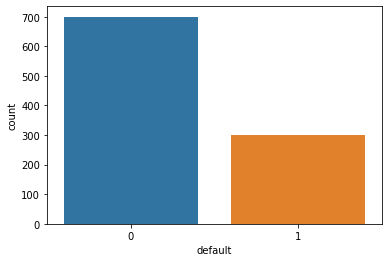

In [7]:
#Check the distribution of the dependent variable
print("Default value distribution : \n",credit_df["default"].value_counts())

#plot for visualization
sns.countplot(credit_df["default"])

#Get the null model accuracy

print("Null model accuracy will be : ",1 - credit_df["default"].mean())

#There is an imbalance in the class distribution as expected generally when it comes to defaults

In [8]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [9]:
#Lets encode all categorical variables
#Keep the list of orginal column names for use later of needed
cat_cols = list(credit_df.select_dtypes(include="object").columns)

#Check
cat_cols

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [10]:
##create a copy and use this going forward. We will use the base date for other experiements later


credit_df_dummies = credit_df.copy()

#get_dummies by default will ignore the already numeric columns and add k new columns for columns with k features
#Also drops the original column

credit_df_dummies = pd.get_dummies(credit_df_dummies)

#sanity check
print(credit_df_dummies.head(2).T)

#All the orginal columns are dropped and new dummy columns added for each value of the categorical columms
#We will not worry about leaving out the last one as part of encoding we are interested in a decision tree based model

                                                       0     1
default                                                0     1
duration_in_month                                      6    48
credit_amount                                       1169  5951
installment_as_income_perc                             4     2
present_res_since                                      4     2
age                                                   67    22
credits_this_bank                                      2     1
people_under_maintenance                               1     1
account_check_status_0 <= ... < 200 DM                 0     1
account_check_status_< 0 DM                            1     0
account_check_status_>= 200 DM / salary assignm...     0     0
account_check_status_no checking account               0     0
credit_history_all credits at this bank paid ba...     0     0
credit_history_critical account/ other credits ...     1     0
credit_history_delay in paying off in the past         

In [11]:
#Check the data frame info and shape again
print("Info after encoding\n",credit_df_dummies.info())
print("Shape after encoding: ",credit_df_dummies.shape)

#No of features has became 61 now and all are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

### Check for highly correlated variables but don't required any treatment for this use case

In [12]:
#Check for correlation among features
corr_matrix = credit_df_dummies.corr()

#Convoluted way to get only the entries with correlation coeffiecent more than certain threshold
corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)].dropna(how="all",axis=0).dropna(how="all",axis=1)

#There seems to be only one set with somewhat high correlation
#Lets check these columns little more based on their original columns



,property_unknown / no property,housing_for free
property_unknown / no property,NaN,0.779853
housing_for free,0.779853,NaN


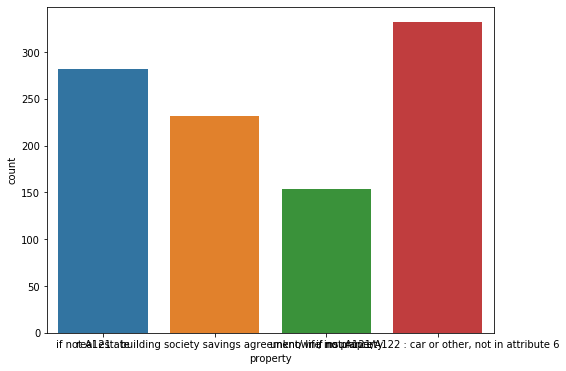

In [13]:
#Check the distribution of these variables in the original df to see if we need to do anything at this time
plt.figure(figsize=(8,6))
sns.countplot(credit_df["property"])


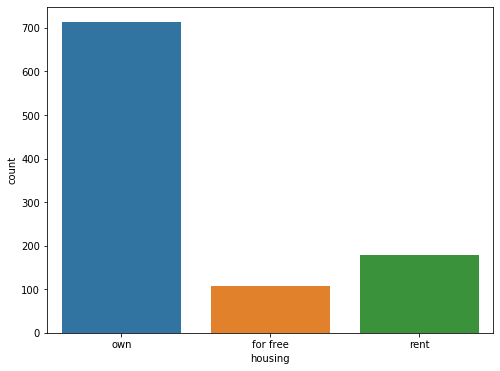

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(credit_df["housing"])

#Both has some variance ..so lets not drop these for now

### Drop the original variables which are converted to dummy

In [15]:
#Original columns were dropped as part of get_dummies invocation. 

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [16]:
#import required libraries from sklearn
from sklearn.model_selection import train_test_split

In [17]:
#Seperate the features and dependent variables
y = credit_df_dummies["default"]

#sanity check
print(y.shape)
print(y.head(3))

X= credit_df_dummies.drop("default",axis=1)

#sanity check
print(X.shape)
print(X.head(3).T)


(1000,)
0    0
1    1
2    0
Name: default, dtype: int64
(1000, 61)
                                                       0     1     2
duration_in_month                                      6    48    12
credit_amount                                       1169  5951  2096
installment_as_income_perc                             4     2     2
present_res_since                                      4     2     3
age                                                   67    22    49
credits_this_bank                                      2     1     1
people_under_maintenance                               1     1     2
account_check_status_0 <= ... < 200 DM                 0     1     0
account_check_status_< 0 DM                            1     0     0
account_check_status_>= 200 DM / salary assignm...     0     0     0
account_check_status_no checking account               0     0     1
credit_history_all credits at this bank paid ba...     0     0     0
credit_history_critical account/ ot

In [18]:
#Split the data into training and testing data sets. We will use standard 30% as the test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [19]:
#import sklearn lib for RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#import the libs for metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
##Default Decision Tree with some regualrization for comparison
tree = DecisionTreeClassifier(criterion="entropy",random_state=9999,\
                              max_depth=10,min_samples_leaf=10,min_samples_split=30)
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
print("Regular Decision Tree Classifier:\n")
print("Classfication Metrics: \n",classification_report(y_test,tree_pred))

#Overall accuracy of 71% and recall for default at 39%

Regular Decision Tree Classifier:

Classfication Metrics: 
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       218
           1       0.47      0.39      0.43        82

    accuracy                           0.71       300
   macro avg       0.63      0.61      0.62       300
weighted avg       0.70      0.71      0.70       300



In [21]:
#Initialize the RF instance per instructions
#Setting max_features to improve the model
#Updated the max_features based on gridsearch invocation later

rfc = RandomForestClassifier(n_estimators=500,criterion="entropy",n_jobs=2,random_state=9999,max_features=45)


#Fit the model
rfc.fit(X_train,y_train)


#Get the predictions for use later
y_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [22]:
#Get the training and test accuracy score
print("Training accuracy score :",accuracy_score(y_train,y_train_pred))
print("Test accuracy score :",accuracy_score(y_test,y_pred))
print("\nTest Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("\nTest Classification Report : \n",classification_report(y_test,y_pred))

##Accuracy is around 75% but the recall value for class 1 (defaulter) is still only around .48
#Both are slightly more than the regualar decision tree
#May have to do manage the imbalance in the data to get some improvement

Training accuracy score : 1.0
Test accuracy score : 0.75

Test Confusion Matrix: 
 [[186  32]
 [ 43  39]]

Test Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       218
           1       0.55      0.48      0.51        82

    accuracy                           0.75       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



### Q6 Show the list of the features importance( 1 Marks)

In [23]:
#Extract the feature importances and store in a dataframe and display
feat_imp_df = pd.DataFrame(rfc.feature_importances_, columns=["Feat. Imp"], index=X.columns)
print("Feature Importance of the Random Forest Classifier : \n",\
      feat_imp_df.sort_values(by="Feat. Imp",ascending=False))

Feature Importance of the Random Forest Classifier : 
                                                     Feat. Imp
credit_amount                                        0.147858
duration_in_month                                    0.096546
age                                                  0.090984
account_check_status_no checking account             0.081428
installment_as_income_perc                           0.034411
present_res_since                                    0.032219
account_check_status_< 0 DM                          0.024797
credit_history_critical account/ other credits ...   0.024079
other_installment_plans_none                         0.020985
credits_this_bank                                    0.015805
savings_unknown/ no savings account                  0.015651
personal_status_sex_female : divorced/separated...   0.014994
present_emp_since_unemployed                         0.013974
savings_... < 100 DM                                 0.013774
account_check_s

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
# Use below values
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds,random_state=seed)

In [26]:
#Validate the Random Forest model build above using k fold, we will try both accuracy and recall
cv = cross_val_score(rfc,X,y,scoring="accuracy",cv=kfold)
cv_recall = cross_val_score(rfc,X,y,scoring="recall",cv=kfold)

print(f"Cross Validated Accuracy Scores: {cv}")
print(f"Cross Validated Recall Scores: {cv_recall}")

Cross Validated Accuracy Scores: [0.84 0.68 0.79 0.8  0.74 0.72 0.8  0.78 0.74 0.77]
Cross Validated Recall Scores: [0.72       0.34375    0.60869565 0.60714286 0.25       0.3902439
 0.5        0.53125    0.44827586 0.4375    ]


In [27]:
#Calculate Mean score
print(f"Cross Validated Accuracy Mean score: {cv.mean():.2f}")
print(f"Cross Validated Recall Mean score: {cv_recall.mean():.2f}")

Cross Validated Accuracy Mean score: 0.77
Cross Validated Recall Mean score: 0.48


In [28]:
# Calculate score standard deviation using std()
print(f"Cross Validated Std. Deviation (Accuracy): {cv.std():.3f}")
print(f"Cross Validated Std. Deviation (Recall): {cv.std():.3f}")

Cross Validated Std. Deviation (Accuracy): 0.044
Cross Validated Std. Deviation (Recall): 0.044


In [29]:
#Average accuracy of the model is 77% with standard deviation of 4.4%
#Average Recall is also around 48% with similar standard deviation

# Q8 Print the confusion matrix( 1 Marks)

In [30]:
#Confusion matrix (again)
confusionMatrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix of the final model:\n",confusionMatrix)

Confusion Matrix of the final model:
 [[186  32]
 [ 43  39]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [31]:
##Manual calculations to check understanding 
print("Correct Predictions (Accuracy): ",(confusionMatrix[0,0] + confusionMatrix[1,1])/ \
      (confusionMatrix[0,0] + confusionMatrix[0,1] + confusionMatrix[1,0] + confusionMatrix[1,1] ))

print(f"Sensitivity/True Positive Rate/Recall - Class 0: \
{confusionMatrix[0,0]/(confusionMatrix[0,0] + confusionMatrix[0,1] ): .3f}")

print(f"Sensitivity/True Positive Rate/Recall - Class 1: \
{confusionMatrix[1,1]/(confusionMatrix[1,0] + confusionMatrix[1,1] ): .3f}")

print(f"Precision - Class 0:  {confusionMatrix[0,0]/(confusionMatrix[0,0] + confusionMatrix[1,0] ): .3f}")

print(f"Precision - Class 1:  {confusionMatrix[1,1]/(confusionMatrix[0,1] + confusionMatrix[1,1] ): .3f} ")

Correct Predictions (Accuracy):  0.75
Sensitivity/True Positive Rate/Recall - Class 0:  0.853
Sensitivity/True Positive Rate/Recall - Class 1:  0.476
Precision - Class 0:   0.812
Precision - Class 1:   0.549 


In [32]:
##Classfication Report gives everything we need on this front
print("Classification Report from Test Run: \n",classification_report(y_test,y_pred))

Classification Report from Test Run: 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       218
           1       0.55      0.48      0.51        82

    accuracy                           0.75       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [33]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [34]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfc.fit(X_, y_)
    y_pred = rfc.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [43]:
##Get the average accuracy and standard deviation..

accuracy = np.array(accuracy)
print('Accuracy Score')
print(f'Avearge: {accuracy.mean() : .3f}')
print(f'Standard deviation: {accuracy.std() :.3f}')

Accuracy Score
Avearge:  0.739
Standard deviation: 0.028


In [44]:
##Try a gridsearch to see if we can get a optimum value of features to pick in the RF model
from sklearn.model_selection import GridSearchCV

In [45]:
#Set the parameters to be tried
#Since the no of records is not huge lets try all the values in the increment of 5 from 10 to 60

params = {"max_features" : [x for x in range(10,61,5)]}

gsv = GridSearchCV(rfc,param_grid=params,cv=5)

In [46]:
#Initiate the search run
gsv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=45,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=2,
                                              oob_score=False,
                                              random_state=9999, verbose=0,
                                              warm_start=False),
             iid='warn'

In [47]:
#Display the full output to get an idea of what happened..we will pick the specific ones later
gsv.cv_results_

{'mean_fit_time': array([0.41378412, 0.45862722, 0.48591385, 0.53848629, 0.58782454,
        0.64842157, 0.67457099, 0.73900867, 0.74376884, 0.79311247,
        0.81277184]),
 'std_fit_time': array([0.00974068, 0.01979422, 0.01398998, 0.0372508 , 0.03120192,
        0.03694541, 0.04161959, 0.03390861, 0.03360937, 0.02660387,
        0.07861449]),
 'mean_score_time': array([0.10333843, 0.10296159, 0.10290513, 0.10278063, 0.10290718,
        0.1036387 , 0.10338964, 0.10269599, 0.1028769 , 0.10282149,
        0.10379033]),
 'std_score_time': array([0.00104651, 0.00076227, 0.00066834, 0.00061353, 0.0006367 ,
        0.00129318, 0.00075222, 0.00049121, 0.00021902, 0.00034791,
        0.00072699]),
 'param_max_features': masked_array(data=[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 10},
  {'max

In [48]:
#Get the best value determined
gsv.best_params_

#We will go back run the RFC with this as the parameter..45 is the best even though we could even go with 40

{'max_features': 45}

In [49]:
##Trying out the same activity with LabelEncoder. Since this is a tree based model..
#ideally this should be comparable with get dummies approach
from sklearn.preprocessing import LabelEncoder

In [50]:
##Initialize the encoder
le = LabelEncoder()

In [51]:
#Get a copy to use
credit_df_le = credit_df.copy()

In [52]:
#Encode all the categorical columns
for c in cat_cols:
    credit_df_le[c] = le.fit_transform(credit_df_le[c])

In [53]:
#Check the datatypes and characteristics now
credit_df_le.info()

#All are numeric now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null int32
duration_in_month             1000 non-null int64
credit_history                1000 non-null int32
purpose                       1000 non-null int32
credit_amount                 1000 non-null int64
savings                       1000 non-null int32
present_emp_since             1000 non-null int32
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null int32
other_debtors                 1000 non-null int32
present_res_since             1000 non-null int64
property                      1000 non-null int32
age                           1000 non-null int64
other_installment_plans       1000 non-null int32
housing                       1000 non-null int32
credits_this_bank             1000 non-null int64
job                           1000 non-null 

In [54]:
#Seperate out the dependent and independent columms
y_le = credit_df_le["default"]

#sanity check
print(y_le.head(2))

X_le = credit_df_le.drop("default",axis=1)

#sanity check
print(X_le.head(2).T)

0    0
1    1
Name: default, dtype: int64
                               0     1
account_check_status           1     0
duration_in_month              6    48
credit_history                 1     3
purpose                        4     4
credit_amount               1169  5951
savings                        4     1
present_emp_since              0     2
installment_as_income_perc     4     2
personal_status_sex            3     0
other_debtors                  2     2
present_res_since              4     2
property                       2     2
age                           67    22
other_installment_plans        1     1
housing                        1     1
credits_this_bank              2     1
job                            1     1
people_under_maintenance       1     1
telephone                      1     0
foreign_worker                 1     1


In [55]:
#Initialize another rfc for this model
#Using max_features again based on grid search results
rfc_le = RandomForestClassifier(n_estimators=500,n_jobs=2,criterion="entropy",random_state=9999,max_features=6)

In [56]:
#Split train and test. test set to have 30%
X_train, X_test, y_train, y_test = train_test_split(X_le,y_le,test_size=0.3,random_state=5)

In [57]:
#Fit the model
rfc_le.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
                       oob_score=False, random_state=9999, verbose=0,
                       warm_start=False)

In [58]:
#Get the test predictions
y_pred_le = rfc_le.predict(X_test)

In [59]:
#Confusion matrix of this new model and test
confusion_matrix(y_test,y_pred_le)

array([[193,  25],
       [ 51,  31]], dtype=int64)

In [60]:
#Get the full metrics
print(classification_report(y_test,y_pred_le))

##Accuracy is kind of similar but recall has come down for this model slightly

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       218
           1       0.55      0.38      0.45        82

    accuracy                           0.75       300
   macro avg       0.67      0.63      0.64       300
weighted avg       0.73      0.75      0.73       300



In [61]:
#Display the feature importances
print(pd.DataFrame(rfc_le.feature_importances_,\
                   columns=["Feat. Imp"],index=X_le.columns).sort_values(by="Feat. Imp",ascending=False))

#looks very similar to the earlier RFC

                            Feat. Imp
credit_amount                0.145388
account_check_status         0.121432
duration_in_month            0.103994
age                          0.102486
purpose                      0.057683
present_emp_since            0.053902
credit_history               0.049859
savings                      0.043991
installment_as_income_perc   0.041658
property                     0.041384
personal_status_sex          0.038517
present_res_since            0.038315
job                          0.031702
other_installment_plans      0.029327
housing                      0.026615
credits_this_bank            0.022332
telephone                    0.020258
people_under_maintenance     0.014360
other_debtors                0.013014
foreign_worker               0.003782


In [62]:
#Lets do a grid search and see what is the best max_features

params = {"max_features" : [x for x in range(2,9)]}

gsv = GridSearchCV(rfc_le,param_grid=params,cv=5,scoring="recall")

In [63]:
#Fit the model and initial search
gsv.fit(X_train,y_train)

C:\Users\rejimonr\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=6,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=500, n_jobs=2,
                                              oob_score=False,
                                              random_state=9999, verbose=0,
                                              warm_start=False),
             iid='warn',

In [64]:
#Get the best value
gsv.best_params_

{'max_features': 6}

In [65]:
#Lets run an Kfold validation to check the scores
kfold = KFold(n_splits=10,random_state=5)
cv = cross_val_score(rfc_le,X,y,cv=kfold,scoring="accuracy")
cv_recall = cross_val_score(rfc_le,X,y,cv=kfold,scoring="recall")

In [66]:
#Get the mean and std dev of the accuracy score
print(f"Mean Accuracy Score: {cv.mean():.2f}")
print(f"Std. Dev of the scores {cv.std():.3f}")

print(f"Mean Recall Score: {cv_recall.mean():.2f}")
print(f"Std. Dev of the scores {cv_recall.std():.3f}")

Mean Accuracy Score: 0.77
Std. Dev of the scores 0.053
Mean Recall Score: 0.40
Std. Dev of the scores 0.125


In [67]:
##Looks like LabelEncoder by assuming the order of categories has got the recall values down